# Setup environment

In [1]:
library(tidyverse)
library(cowplot)
library(effects)

# set the plot size
options(
    repr.plot.width  = 4, 
    repr.plot.height = 2)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 2.2.1     ✔ purrr   0.2.4
✔ tibble  1.4.2     ✔ dplyr   0.7.4
✔ tidyr   0.8.0     ✔ stringr 1.3.0
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘cowplot’

The following object is masked from ‘package:ggplot2’:

    ggsave

Loading required package: carData
lattice theme set by effectsTheme()
See ?effectsTheme for details.


# Read in data

In [2]:
dat_raw <- read_fwf(
    "HW3-prob4.dat", 
    fwf_positions(
        c(4, 14, 21, 25), 
        c(7, 14, 21, 29),
        col_names = c(
            "days", "status", "success", "age")),  
        skip = 1)

dat <- dat_raw
dat$status <- factor(dat$status)

Parsed with column specification:
cols(
  days = col_double(),
  status = col_integer(),
  success = col_integer(),
  age = col_double()
)
Warning message in rbind(names(probs), probs_f):
“number of columns of result is not a multiple of vector length (arg 1)”Warning message:
“24 parsing failures.
row # A tibble: 5 x 5 col     row col   expected actual file            expected   <int> <chr> <chr>    <chr>  <chr>           actual 1     1 age   5 chars  4      'HW3-prob4.dat' file 2     2 age   5 chars  4      'HW3-prob4.dat' row 3     3 age   5 chars  4      'HW3-prob4.dat' col 4     4 age   5 chars  4      'HW3-prob4.dat' expected 5     5 age   5 chars  4      'HW3-prob4.dat'
... ................. ... ............................................. ........ ............................................. ...... ............................................. .... ............................................. ... ............................................. ... ..............................

# Q1  
**Suppose we collected measurements on 70 subjects, where the response (Y ) was SBP, and the predictors were age (X as continuous), gender (Z as categorical 0=male, 1=female), education level (high-school, BS, MS and PhD).**

- (a) Using dummy variables, specify the appropriate single regression model relating SBP to age, gender, and education level includes the following interactions: age×gender, age×education, and gender×education.

- (b) In terms of regression parameters from a), state the null hypothesis to be tested for the following:
    - 1) All regression equations are coincide.
    - 2) All regression equations are parallel.
    - 3) All gender equations are parallel, controlling for education level.
    - 4) All education equations are parallel, controlling for gender.


- c) For each of the hypotheses given in part a) specify the degrees of freedom and the test statistic.

-----

**(a) Using dummy variables, specify the appropriate single regression model relating SBP to age, gender, and education level includes the following interactions: age x gender, age x education, and gender x education.**

set up a dummy variables gender, and $E_1$, $E_2$, $E_3$ for education

- male: gender = 0
- female: gender = 1
- phD: $E_1 = 1$, $E_2 = 0$, $E_3 = 0$
- MS:  $E_1 = 0$, $E_2 = 1$, $E_3 = 0$
- BS:  $E_1 = 0$, $E_2 = 0$, $E_3 = 1$
- High School: $E_1 = 0$, $E_2 = 0$, $E_3 = 0$

set up single regression model  
$Y =$  
$\beta_0 + \beta_1 \times age + \beta_2 \times gender + \\
\beta_3  \times E_1 +  \beta_4 \times E_2 + \beta_5 \times E_3 + \\
\beta_6  \times age    \times gender + \\   
\beta_7  \times age    \times E_1 +    \\
\beta_8  \times age    \times E_2 +    \\
\beta_9  \times age    \times E_3 +    \\
\beta_{10} \times gender \times E_1 +    \\
\beta_{11} \times gender \times E_2 +    \\
\beta_{12} \times gender \times E_3 + \epsilon$

**(b) In terms of regression parameters from a), state the null hypothesis to be tested for the following:**

- 1) All regression equations are coincide.

$H_0: \beta_2 = \beta_3 = \beta_4 = \dots = \beta_{12} = 0$

- 2) All regression equations are parallel.

$H_0: \beta_6 = \beta_7 = \beta_8 = \beta_9 = 0$

- 3) All gender equations are parallel, controlling for education level.

$H_0: \beta_6 = 0$

- 4) All education equations are parallel, controlling for gender.

$H_0: \beta_7 = \beta_8 = \beta_9 = 0$

**c) For each of the hypotheses given in part a) specify the degrees of freedom and the test statistic.**

- $H_0: \beta_2 = \beta_3 = \beta_4 = \dots = \beta_{12} = 0$
    - **F(9, 70 - 13) = F(9, 67)**
- $H_0: \beta_6 = \beta_7 = \beta_8 = \beta_9 = 0$
    - **F(4, 67)**
- $H_0: \beta_6 = 0$
    - **F(1, 67)**
- $H_0: \beta_7 = \beta_8 = \beta_9 = 0$
    - **F(3, 67)**

# Q2
**An investigator is interested in whether Bayer aspirin (treatment ”A”), Tylenol (ac-etaminophen) (treatment ”B”) or Aleve (naproxen) (treatment ”C”) works more quickly to relieve the pain of a common headache. She recruits n individuals with frequent headaches, randomly assigns them to one of the three pain killers, asks them to take the medication upon first signs of the headache, and to record the time until the pain is gone (Y).**

- a) Using indicator (dummy) variables in regression and set up the model for the experiment above. Assume $n_i$, i = 1, 2, 3 subjects are randomized to group i, where
$n = n_1 + n_2 + n_3$.
- b) Write your model in part a) in a matrix form as $Y = X\beta + \epsilon$, identify the design-matrix X as well as Y , $\beta$ and $\epsilon$ vectors.
- c) State the null hypothesis of no difference among the means of the three groups.
How would you carry-out this test and what is the distribution of the proposed test
statistic?
- d) Provide the least-squares estimates $\hat{β}$ algebraically.
- e) Provide an expression for Var-Cov matrix for $\hat{β}$.

-----

- **a) Using indicator (dummy) variables in regression and set up the model for the experiment above. Assume $n_i$, i = 1, 2, 3 subjects are randomized to group i, where
$n = n_1 + n_2 + n_3$.**

- trtA: $D_1 = 1$, $D_2 = 0$
- trtB:  $D_1 = 0$, $D_2 = 1$
- trtC:  $D_1 = 0$, $D_2 = 0$

-> set up regression model  
$Y = \beta_0 + \beta_1 \times D_1 + \beta_2 \times D_2 + \epsilon$

- **b) Write your model in part a) in a matrix form as $Y = X\beta + \epsilon$, identify the design-matrix X as well as Y , $\beta$ and $\epsilon$ vectors.**

$Y = X \beta + \epsilon$

$\beta \in R^{3 \times 1}$ 

$$\begin{bmatrix}
    \beta_0 \\
    \beta_1 \\
    \beta_2
\end{bmatrix}$$

$X \in R^{(n_1 + n_2 + n_3) \times 3}$ 

$$\begin{bmatrix}
    1      & 1      & 0      \\
    \vdots & \vdots & \vdots \\
    1      & 1      & 0      \\
    1      & 0      & 1      \\
    \vdots & \vdots & \vdots \\
    1      & 0      & 1      \\
    1      & 0      & 0 \\
    \vdots & \vdots & \vdots \\
    1      & 0      & 0
\end{bmatrix}$$

$Y \in R^{(n_1 + n_2 + n_3) \times 1}$ 

$$\begin{bmatrix}
    y_{1n_1} \\
    \vdots   \\
    y_{1n_1} \\
    y_{21}   \\
    \vdots   \\
    y_{2n_2} \\
    y_{31}   \\
    \vdots   \\
    y_{3n_3} 
\end{bmatrix}$$

$\epsilon \in R^{(n_1 + n_2 + n_3) \times 3}$ 

$$\begin{bmatrix}
    \epsilon_{1n_1} \\
    \vdots          \\
    \epsilon_{1n_1} \\
    \epsilon_{21}   \\
    \vdots          \\
    \epsilon_{2n_2} \\
    \epsilon_{31}   \\
    \vdots          \\
    \epsilon_{3n_3} 
\end{bmatrix}$$

- **c) State the null hypothesis of no difference among the means of the three groups. How would you carry-out this test and what is the distribution of the proposed test statistic?**

$H_0: \beta_1 = \beta_2 = 0$

- $\text{Model}_\text{full} : Y = \beta_0 + \beta_1 * D_1 + \beta_2 * D_2 + \epsilon$
- $\text{Model}_\text{reduced} : Y = \beta_0 + \epsilon$

$SSR_\text{Partial} = SSR(\text{Model}_\text{full}) - SSR(\text{Model}_\text{reduced})$

Where the $SSR_\text{Partial}$ equals to the $SS_\text{trt}$ in the lecture slides.

$F_\text{Partial} = \frac{SSR_\text{Partial} / 2}{MSE_\text{Full}} \widetilde{} F(2, n - 3)$

- **d) Provide the least-squares estimates $\hat{β}$ algebraically.**

$\hat{\beta} = (X^TX)^{-1}X^TY$

$$X^TX = \begin{bmatrix}
    n   & n_1 & n_2 \\
    n_1 & n_1 & 0   \\
    n_2 & 0   & n_2
\end{bmatrix}$$

Since n1 = n2 = n3 = 10, we have

$$X^TX = \begin{bmatrix}
    30   & 10 & 10  \\
    10   & 10 & 0   \\
    10   & 0  & 10
\end{bmatrix}$$

calculate $(X^TX)^{-1}$

In [3]:
mat <- matrix(c(30, 10, 10, 10, 10, 0, 10, 0, 10), 3, 3)
solve(mat)

0.1,-0.1,-0.1
-0.1,0.2,0.1
-0.1,0.1,0.2


For $X^TY$, it is

$$X^TY = \begin{bmatrix}
    y_{..} \\
    y_{1.} \\
    y_{2.} 
\end{bmatrix}$$

The result would be
$(X^TX)^{-1}X^TY = \begin{bmatrix}
    0.1  & -0.1 & -0.1  \\
   -0.1  &  0.2 &  0.1  \\
   -0.1  &  0.1 &  0.2
\end{bmatrix} \begin{bmatrix}
    y_{..} \\
    y_{1.} \\
    y_{2.} 
\end{bmatrix} = \begin{bmatrix}
    0.1 y_{3.} \\
    0.1 y_{1.} \\
    0.1 y_{2.} 
\end{bmatrix}$

- **e) Provide an expression for Var-Cov matrix for $\hat{\beta}$.**

$\text{var}(\hat{\beta}) = \hat{\sigma}^2 (X^TX)^{-1} = \hat{\sigma}^2 \begin{bmatrix}
    0.1  & -0.1 & -0.1  \\
   -0.1  &  0.2 &  0.1  \\
   -0.1  &  0.1 &  0.2
\end{bmatrix}$

# Q3
**For the experiment in problem `#2` above, express the regression model as ”cell-mean” model, that is $Y_{ij} = \mu_i + \epsilon_{ij}$ . Where $\mu_i$ is the mean of the $i^{th}$ treatment group.**

- a) Write the ”cell-mean” model above in a matrix form as $Y = X\mu + \epsilon$, identify the design-matrix X and the parameters vector $\mu_i$ for the ”cell-mean” model.
- b) State the null hypothesis of no difference among the means of the three groups.
- c) Provide the least-squares estimates $\hat{\mu}$ algebraically.

-----

- **a) Write the ”cell-mean” model above in a matrix form as $Y = X\mu + \epsilon$, identify the design-matrix X and the parameters vector $\mu_i$ for the ”cell-mean” model.**

$X \in R^{(n_1 + n_2 + n_3) \times 3}$ 

$$\begin{bmatrix}
    1      & 0      & 0      \\
    \vdots & \vdots & \vdots \\
    1      & 0      & 0      \\
    0      & 1      & 0      \\
    \vdots & \vdots & \vdots \\
    0      & 1      & 0      \\
    0      & 0      & 1      \\
    \vdots & \vdots & \vdots \\
    0      & 0      & 1
\end{bmatrix}$$

$\mu \in R^{3 \times 1}$ 

$$\begin{bmatrix}
    \mu_1 \\
    \mu_2 \\
    \mu_3
\end{bmatrix}$$

- **b) State the null hypothesis of no difference among the means of the three groups.**

$H_0: \mu_1 = \mu_2 = \mu_3$

- **c) Provide the least-squares estimates $\hat{\mu}$ algebraically.**

$\hat{\mu} = (X^TX)^{-1}X^TY$

$$X^TX = \begin{bmatrix}
    n_1 & 0   & 0   \\
    0   & n_2 & 0   \\
    0   & 0   & n_3
\end{bmatrix}$$

$$(X^TX)^{-1} = \begin{bmatrix}
    \frac{1}{n_1} & 0   & 0   \\
    0   & \frac{1}{n_2} & 0   \\
    0   & 0   & \frac{1}{n_3}
\end{bmatrix}$$

$$X^TY = \begin{bmatrix}
    \sum y_{1j} \\
    \sum y_{2j} \\
    \sum y_{3j} 
\end{bmatrix}$$

$$\hat{\mu} = (X^TX)^{-1}X^TY = \begin{bmatrix}
    \frac{1}{n_1} \sum y_{1j} = \bar{y_{1.}} \\
    \frac{1}{n_2} \sum y_{2j} = \bar{y_{2.}} \\
    \frac{1}{n_3} \sum y_{3j} = \bar{y_{3.}} 
\end{bmatrix}$$

# Q4
**A rehabilitation center researcher was interested in examining the relationship between physical ftness level prior to surgery of persons un-dergoing corrective knee surgery and time required in physical therapy until successful rehabilitation (in days). Patient records from the rehabilitation center were examined, and 24 male subjects ranging in age from 18 to 30 years who had undergone similar corrective knee surgery during the past year were selected for the study. The number of days required for successful recovery and fitness level (1=below average, 2=average and 3=above average) were recorded. The patient’s age at the time of surgery was also recorded becuase previous studies have shown that younger patients tend to recover more qucikly. Data is given in HW3-prob4.dat file on Sakai.**

- a) Fit the ANCOVA model. Based on this model fit, is there evidence that time to recovery differs across fitness levels after accounting for a patient’s age? Please provide the hypotheses, test statistic, and p-value of the test used to adress this question.
- b) Using the model fit in part (a), provide the estimated regression model for each fitness level group.
- c) Estimate the overall slope beween days to recovery and patient age by removing fitness level from the model fit in part (a). How does this slope estimate compare to the slope estimates reported in part (b)?
- d) Compute the unadjusted mean days to recovery for each fitness level group. Using this numerical ouput, what factor level differences appear to be driving the global signal from fitness level if one exists?
- e) Compute the mean days to recovery for each fitness level adjusted for average patient age. Using this numerical ouput, what factor level difference appear to be driving the global signal from fitness level if one exists? Does your conclusion differ from the conclusion you reached in part (d)? If so, why does the discrepancy exist?
- f) Was it benefcial to inlcude patient age in this analysis when the primary goal was to assess the relationship between days to recovery and fitness level? Explain your reasoning.

-----

- **a) Fit the ANCOVA model. Based on this model fit, is there evidence that time to recovery differs across fitness levels after accounting for a patient’s age? Please provide the hypotheses, test statistic, and p-value of the test used to adress this question.**

Set up the model for ANCOVA model:  
$$y_{ijk} = \mu_{..} + \tau_i + \beta \times X_j + \epsilon_{ijk} = \mu_{..} + \text{fittness}_i + \beta \times \text{Age}_j + \epsilon_{ijk}$$

First, the interaction term is tested to see to see if fittness status significantly interacts with the age variable.

$H_0: \beta_1 = \beta_2 = \beta_3 = \beta^*$

Where $\beta_1$, $\beta_2$, and $\beta_3$, are slopes for each fitness levels. 

In the table below, the F test (F statistic) of the interaction term indicated that the status does not significantly interact with patient's age (P value = 7.19 > 0.05).

In [4]:
res <- lm(days ~ status * age , data = dat)
anova(res)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
status,2,672.0000000,336.0000000,1017.5115219,3.061316e-19
age,1,409.8342521,409.8342521,1241.1043856,4.655692e-18
status:age,2,0.2218349,0.1109174,0.3358922,7.190849e-01
Residuals,18,5.9439130,0.3302174,NA,NA


<br />
It turns out the interaction term is not significant. Therefore, the data is fitted by the model without the interaction term. Notice that both the status and age are significant.

In [5]:
res <- aov(days ~ status + age , data = dat)
summary(res)

            Df Sum Sq Mean Sq F value Pr(>F)    
status       2  672.0   336.0    1090 <2e-16 ***
age          1  409.8   409.8    1329 <2e-16 ***
Residuals   20    6.2     0.3                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

- **b) Using the model fit in part (a), provide the estimated regression model for each fitness level group.**

In [6]:
res <- aov(days ~ status + age , data = dat)
print(coef(res))

(Intercept)     status2     status3         age 
   7.431688   -1.847379   -8.722893    1.167286 


- Status 1: Days = 7.43 + 1.17 * age
- Status 2: Days = 7.43 - 1.85 + 1.17 * age =  5.58 + 1.17 * age
- Status 3: Days = 7.43 - 8.72 + 1.17 * age = -1.29 + 1.17 * age

- **c) Estimate the overall slope beween days to recovery and patient age by removing fitness level from the model fit in part (a). How does this slope estimate compare to the slope estimates reported in part (b)?**

When including the fitness level, the slope is about 1.17; on the other hand, the slope is 1.47 when not including the patients level. 

In [7]:
res_lm <- lm(days ~ age , data = dat)
print(coef(res_lm))

(Intercept)         age 
  -2.681956    1.471133 


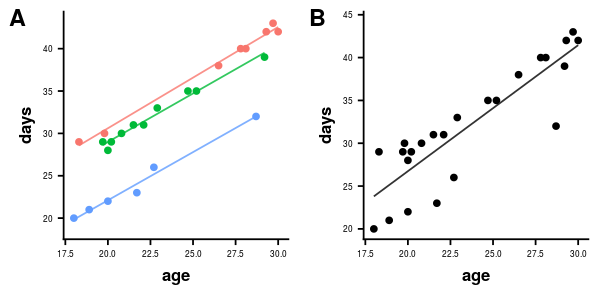

In [8]:
my_theme <- theme(
    axis.title = element_text(size=10, face="bold"),
    axis.text  = element_text(size=5),
    legend.position = "none")

gp1 <- ggplot(
    dat_raw, aes(
        x = age, y = days,
        color = as.factor(status))) + 
    geom_line(
        stat="smooth", method = "lm",
        size = 0.5, alpha = 0.8) +
    geom_point() +
    my_theme

gp2 <- ggplot(
    dat_raw, aes(
        x = age, y = days)) + 
    geom_line(
        stat="smooth", method = "lm",
        size = 0.5, alpha = 0.8) +
    geom_point() +
    my_theme

options(repr.plot.width = 5, repr.plot.height = 2.5)
plot_grid(
    gp1, gp2, 
    labels = c("A", "B"), 
    ncol = 2, nrow = 1)

- **d) Compute the unadjusted mean days to recovery for each fitness level group. Using this numerical ouput, what factor level differences appear to be driving the global signal from fitness level if one exists?**

In [9]:
mean_unadj <- dat %>% group_by(status) %>% summarise(unadjusted_mean = mean(days))
mean_unadj

status,unadjusted_mean
1,38
2,32
3,24


In [10]:
res <- aov(days ~ status + age , data = dat)
print(coef(res))

(Intercept)     status2     status3         age 
   7.431688   -1.847379   -8.722893    1.167286 


- **e) Compute the mean days to recovery for each fitness level adjusted for average patient age. Using this numerical ouput, what factor level difference appear to be driving the global signal from fitness level if one exists? Does your conclusion differ from the conclusion you reached in part (d)? If so, why does the discrepancy exist?**

I used the coefficient of the ANCOVA model to calculate the adjusted mean days to recovery for each fitness level. 

In [11]:
mean_adj <- tribble(
    ~status, ~adjusted_mean,
    "1", coef(res)[1] +                coef(res)[4] * mean(dat$age),
    "2", coef(res)[1] + coef(res)[2] + coef(res)[4] * mean(dat$age),
    "3", coef(res)[1] + coef(res)[3] + coef(res)[4] * mean(dat$age))
mean_adj

status,adjusted_mean
1,34.95046
2,33.10309
3,26.22757


Comparing to the unadjusted mean of days, there are some differences between the adjusted mean adn unadjusted mean. The differences occur because the adjusted mean is calculated when adding the age variable into the model. The comparison is shown below.

Notice that the diference between status 1 and status 2 become smaller (from 38-32 = 6) to (34.95 - 33.10 = 1.85)). This may indicate that by a including age for adjustment. The adjusted mean of status 1 and status 2 are closer, compared to the distance of state 1, 2 adn status 3.

In [12]:
tmp <- left_join(
    mean_unadj, mean_adj, by = "status") %>% 
    mutate(differece = unadjusted_mean - adjusted_mean)
tmp

Warning message:
“Column `status` joining factor and character vector, coercing into character vector”

status,unadjusted_mean,adjusted_mean,differece
1,38,34.95046,3.049536
2,32,33.10309,-1.103086
3,24,26.22757,-2.227572


<br/>

The adjusted mean was rechecked using R function "effect". It turns out our calculations are correct.

In [13]:
effect("status", res)


 status effect
status
       1        2        3 
34.95046 33.10309 26.22757 

- **f) Was it benefcial to inlcude patient age in this analysis when the primary goal was to assess the relationship between days to recovery and fitness level? Explain your reasoning.**

The days to recovery may be depend on the health condition of a person. Since the health condition of a person may be depend on age, it is reasonable to include age variable into the model. For example, we may expect a younger person recovers more quicker.